## MACHINE LEARNING PROJECT

In [1619]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

In [1620]:
data=pd.read_csv(r"C:\Users\dell\Downloads\ml__project.csv")
data

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...
19995,Philadelphia,69.951191,94.209184,22.901617,0.000000,25.521977,1034.487979,0
19996,Philadelphia,50.052957,38.503386,0.433923,0.018444,46.566128,1008.659806,0
19997,Philadelphia,84.565626,50.674726,22.483121,0.000000,82.410337,1032.862955,0
19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Data understanding

In [1622]:
data.shape

(20000, 8)

In [1623]:
data.size

160000

In [1624]:
data.dtypes

Location          object
Temperature      float64
Humidity         float64
Wind Speed       float64
Precipitation    float64
Cloud Cover      float64
Pressure         float64
Rain Tomorrow      int64
dtype: object

In [1625]:
data.ndim

2

In [1626]:
data.columns

Index(['Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [1627]:
data.head()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [1628]:
data.tail()

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
19995,Philadelphia,69.951191,94.209184,22.901617,0.000000,25.521977,1034.487979,0
19996,Philadelphia,50.052957,38.503386,0.433923,0.018444,46.566128,1008.659806,0
19997,Philadelphia,84.565626,50.674726,22.483121,0.000000,82.410337,1032.862955,0
19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [1629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       19998 non-null  object 
 1   Temperature    19998 non-null  float64
 2   Humidity       19998 non-null  float64
 3   Wind Speed     19998 non-null  float64
 4   Precipitation  19998 non-null  float64
 5   Cloud Cover    19998 non-null  float64
 6   Pressure       19998 non-null  float64
 7   Rain Tomorrow  20000 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [1630]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000,20000.000000
mean,65.050016,59.606819,15.005048,0.389745,54.904646,1005.133954,0.219200
std,20.207093,23.088395,8.688475,0.476323,26.013946,20.231096,0.413715
min,30.011057,20.001821,0.001756,0.000000,10.000856,970.002299,0.000000
25%,47.503435,39.461985,7.415077,0.000000,32.185333,987.642319,0.000000
50%,64.989135,59.689629,15.159939,0.190242,54.875754,1005.152664,0.000000
75%,82.440136,79.389720,22.558967,0.672243,77.529251,1022.788974,0.000000
max,99.994976,99.999025,29.997889,3.020943,99.987804,1039.993521,1.000000


In [1631]:
data.isnull().sum()

Location         2
Temperature      2
Humidity         2
Wind Speed       2
Precipitation    2
Cloud Cover      2
Pressure         2
Rain Tomorrow    0
dtype: int64

In [1632]:
data["Rain Tomorrow"].unique()

array([0, 1], dtype=int64)

In [1633]:
data["Rain Tomorrow"].value_counts()

Rain Tomorrow
0    15616
1     4384
Name: count, dtype: int64

In [1634]:
data.duplicated().sum()

1

### EDA

## CORRELATION,HEATMAP

In [1637]:
df=data.select_dtypes(include="number").corr()
df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
Temperature,1.000000,-0.007911,0.003093,0.005765,-0.006630,-0.002658,-0.002350
Humidity,-0.007911,1.000000,-0.016526,0.007988,-0.008894,-0.001605,0.468449
Wind Speed,0.003093,-0.016526,1.000000,-0.012106,-0.004321,0.001046,-0.015587
Precipitation,0.005765,0.007988,-0.012106,1.000000,-0.002133,0.011561,0.492051
Cloud Cover,-0.006630,-0.008894,-0.004321,-0.002133,1.000000,-0.002211,-0.009684
Pressure,-0.002658,-0.001605,0.001046,0.011561,-0.002211,1.000000,0.004162
Rain Tomorrow,-0.002350,0.468449,-0.015587,0.492051,-0.009684,0.004162,1.000000


<Axes: >

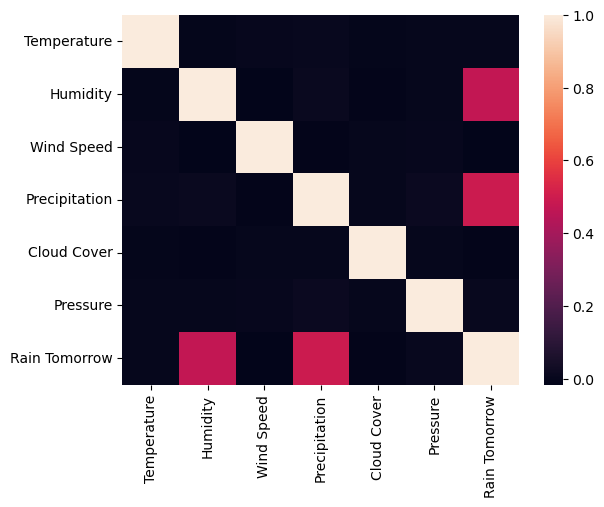

In [1638]:
sns.heatmap(df)

## Visualize Data Distribution

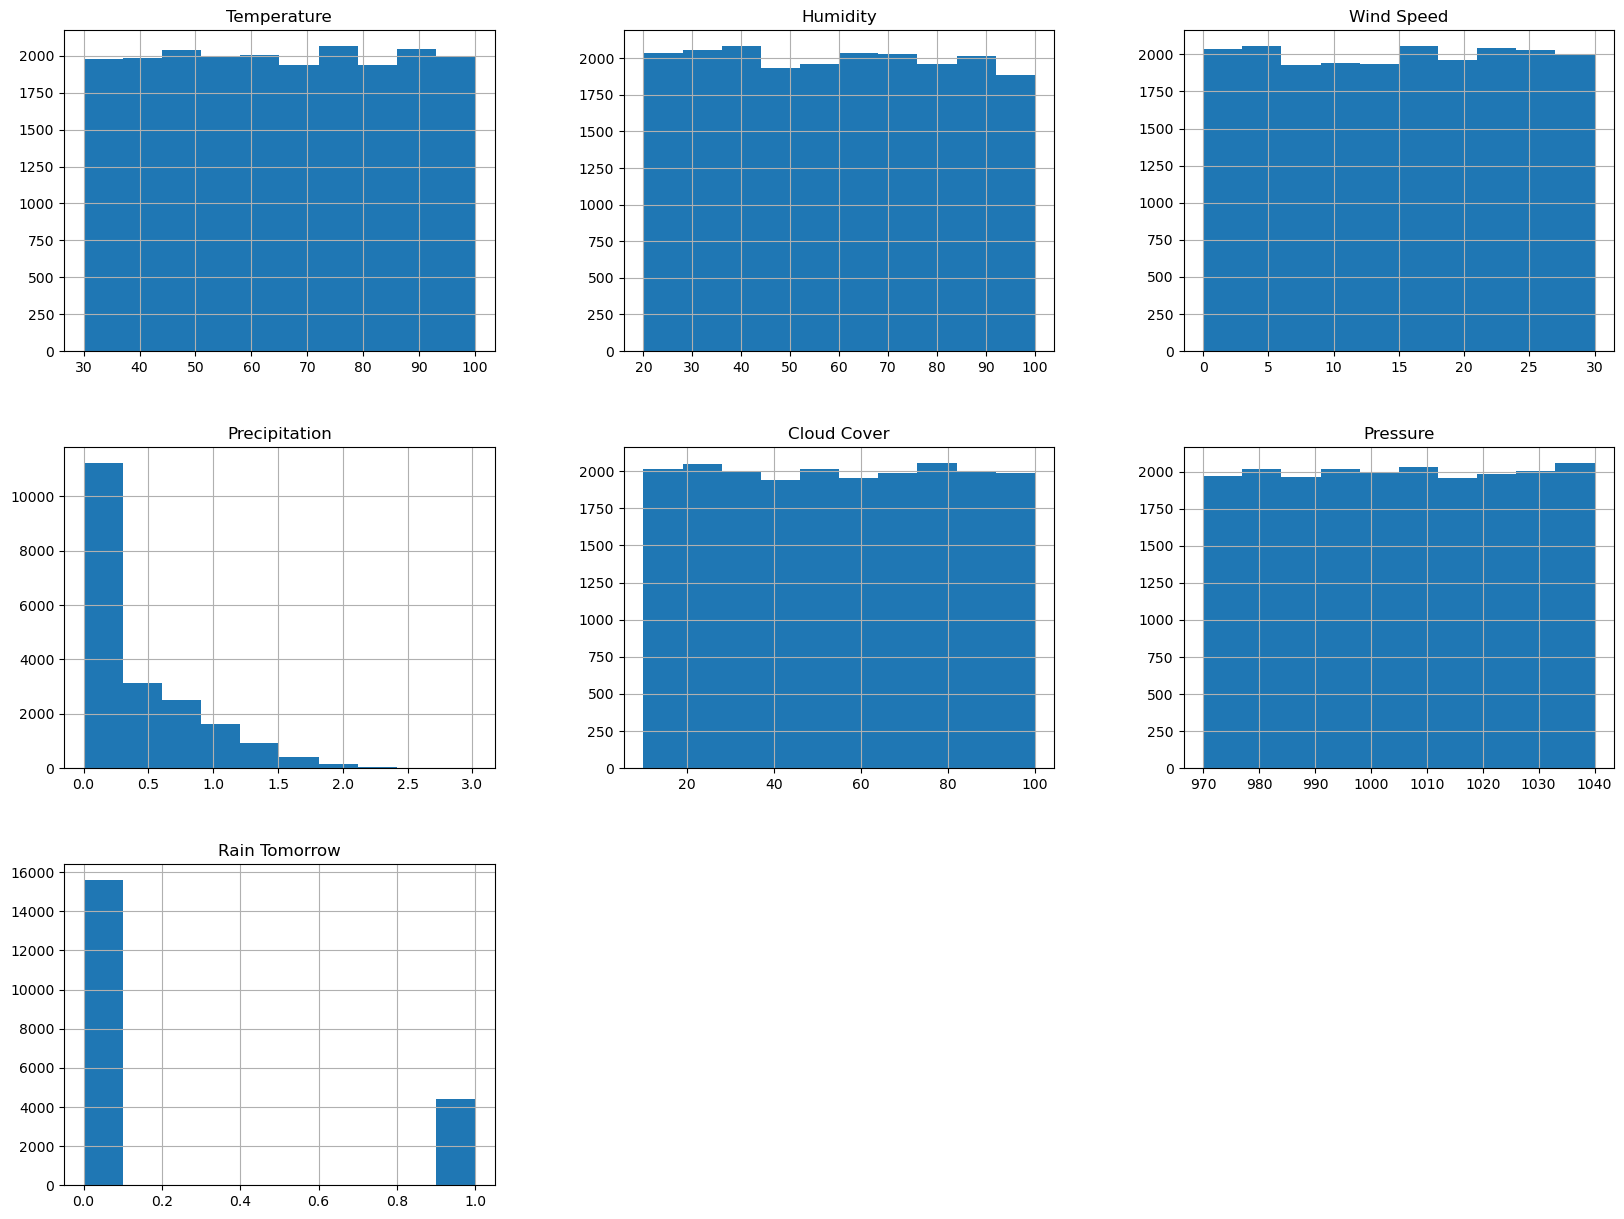

In [1640]:
data.hist(figsize=(20,15))
plt.savefig('plt.png')

## BOX PLOT


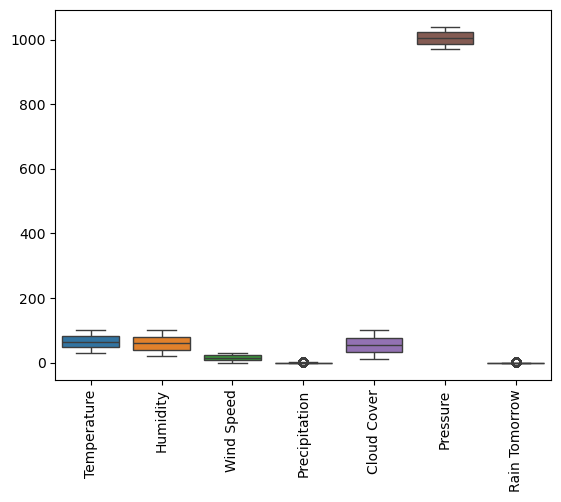

In [1642]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

##  Preprocessing

## Handle Missing Values/Duplicates

In [1645]:
df=df.drop_duplicates()

In [1646]:
df.duplicated().sum()

0

In [2221]:
data.isnull().sum()

Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [2223]:
data["Location"] = data["Location"].fillna(data["Location"].mode()[0])
data["Temperature"] = data["Temperature"].fillna(data["Temperature"].mean())
data["Humidity"] = data["Humidity"].fillna(data["Humidity"].median())
data["Wind Speed"] = data["Wind Speed"].fillna(data["Wind Speed"].median())
data["Precipitation"] = data["Precipitation"].fillna(data["Precipitation"].median())
data["Cloud Cover"] = data["Cloud Cover"].fillna(data["Cloud Cover"].mean())
data["Pressure"] = data["Pressure"].fillna(data["Pressure"].mean())

In [2225]:
data.isnull().sum()

Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

## Outliers detecting and replacing

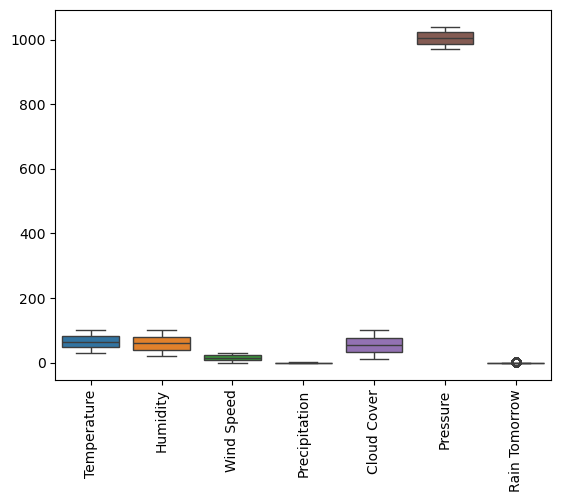

In [1651]:
Q1=data["Precipitation"].quantile(0.25)
Q3=data["Precipitation"].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
data.loc[(data["Precipitation"]>=ub),"Precipitation"]=ub
data.loc[(data["Precipitation"]<=lb),"Precipitation"]=lb

sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

# LABEL ENCODING

In [1653]:
le=LabelEncoder()
data["Location"]=le.fit_transform(data["Location"])
data

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,3,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,3,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,3,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,3,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...
19995,4,69.951191,94.209184,22.901617,0.000000,25.521977,1034.487979,0
19996,4,50.052957,38.503386,0.433923,0.018444,46.566128,1008.659806,0
19997,4,84.565626,50.674726,22.483121,0.000000,82.410337,1032.862955,0
19998,0,65.050016,59.689629,15.159939,0.190242,54.904646,1005.133954,0


# SPLITING

In [2227]:
x = data.drop("Rain Tomorrow", axis=1)
y = data["Rain Tomorrow"]

In [1656]:
x.columns

Index(['Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Pressure'],
      dtype='object')

In [2229]:
x

,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,3,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278
1,3,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065
2,3,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739
3,3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163
4,3,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859
...,...,...,...,...,...,...,...
19995,4,69.951191,94.209184,22.901617,0.000000,25.521977,1034.487979
19996,4,50.052957,38.503386,0.433923,0.018444,46.566128,1008.659806
19997,4,84.565626,50.674726,22.483121,0.000000,82.410337,1032.862955
19998,0,65.050016,59.689629,15.159939,0.190242,54.904646,1005.133954


In [1658]:
y

0        0
1        0
2        1
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Rain Tomorrow, Length: 20000, dtype: int64

# SD SCALING

In [2231]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[ 3.74964826e-01,  1.11230568e+00,  6.95147143e-01, ...,
        -8.33609229e-01,  5.65635969e-01,  1.03295893e+00],
       [ 3.74964826e-01,  9.01202068e-01, -1.33818430e+00, ...,
         3.06071633e-01, -5.11248658e-01, -4.53390019e-01],
       [ 3.74964826e-01,  7.86566640e-01,  2.22345520e-01, ...,
         1.14924690e+00,  8.63452292e-01, -1.20305107e+00],
       ...,
       [ 9.56170477e-01,  9.65852614e-01, -3.86894423e-01, ...,
        -8.33609229e-01,  1.05742337e+00,  1.37071570e+00],
       [-1.36865213e+00, -7.03313464e-16,  3.58654738e-03, ...,
        -4.22192268e-01,  2.73159647e-16,  5.61983229e-15],
       [-1.36865213e+00, -7.03313464e-16,  3.58654738e-03, ...,
        -4.22192268e-01,  2.73159647e-16,  5.61983229e-15]])

# TRAINING MODEL

In [1662]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

FIT MODELS

In [2239]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [2241]:
test_pred=model1.predict(x_test)
test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [2243]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [2245]:
score1=accuracy_score(y_test,test_pred)
score1

0.90725

In [2247]:
train_pred=model1.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [2249]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [2251]:
score2=accuracy_score(train_pred,y_train)
score2

0.908

In [2253]:
cm1=confusion_matrix(test_pred,y_test)
print(cm1)

[[2980  236]
 [ 135  649]]


In [1672]:
cp1=classification_report(test_pred,y_test)
print(cp1)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3216
           1       0.73      0.83      0.78       784

    accuracy                           0.91      4000
   macro avg       0.84      0.88      0.86      4000
weighted avg       0.91      0.91      0.91      4000



In [1673]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [1674]:
test_pred=model2.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1675]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1676]:
score3=accuracy_score(test_pred,y_test) 
score3

0.99975

In [1677]:
train_pred=model2.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1678]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1679]:
score4=accuracy_score(train_pred,y_train)
score4 

1.0

In [1680]:
cm2=confusion_matrix(test_pred,y_test)
print(cm2)

[[3115    1]
 [   0  884]]


In [1681]:
cp2=classification_report(test_pred,y_test)
print(cp2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00       884

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [1682]:
model3=RandomForestClassifier(n_estimators=47,random_state=34)
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=47, random_state=34)

In [1683]:
test_pred=model3.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1684]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1685]:
score5=accuracy_score(test_pred,y_test)
score5   

0.99975

In [1686]:
train_pred=model3.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1687]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1688]:
score6=accuracy_score(train_pred,y_train)
score6    

1.0

In [1689]:
cm3=confusion_matrix(test_pred,y_test)
print(cm3)

[[3115    1]
 [   0  884]]


In [1690]:
cp3=classification_report(test_pred,y_test)
print(cp3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00       884

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [1691]:
model4=AdaBoostClassifier()
model4.fit(x_train,y_train)

AdaBoostClassifier()

In [1692]:
test_pred=model4.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1693]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1694]:
score7=accuracy_score(test_pred,y_test)
score7 

0.99975

In [1695]:
train_pred=model4.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1696]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1697]:
score8=accuracy_score(train_pred,y_train)
score8 

1.0

In [1698]:
cm4=confusion_matrix(test_pred,y_test)
print(cm4)

[[3115    1]
 [   0  884]]


In [1699]:
cp4=classification_report(test_pred,y_test)
print(cp4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00       884

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [1700]:
model5=GradientBoostingClassifier()
model5.fit(x_train,y_train)

GradientBoostingClassifier()

In [1701]:
test_pred=model5.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1702]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1703]:
score9=accuracy_score(test_pred,y_test)
score9    

0.99975

In [1704]:
train_pred=model5.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1705]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1706]:
score10=accuracy_score(train_pred,y_train)
score10    

1.0

In [1707]:
cm5=confusion_matrix(test_pred,y_test)
print(cm5)

[[3115    1]
 [   0  884]]


In [1708]:
cp5=classification_report(test_pred,y_test)
print(cp5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00       884

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [1709]:
model6=XGBClassifier()
model6.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1710]:
test_pred=model6.predict(x_test)
test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [1711]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1712]:
score11=accuracy_score(test_pred,y_test)
score11

0.99925

In [1713]:
train_pred=model6.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0])

In [1714]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1715]:
score12=accuracy_score(train_pred,y_train)
score12  

1.0

In [1716]:
cm6=confusion_matrix(test_pred,y_test)
print(cm6)

[[3114    2]
 [   1  883]]


In [1717]:
cp6=classification_report(test_pred,y_test)
print(cp6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3116
           1       1.00      1.00      1.00       884

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [1718]:
model7=KNeighborsClassifier(n_neighbors=10)
model7.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [1719]:
test_pred=model7.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1720]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1721]:
score13=accuracy_score(test_pred,y_test)
score13  

0.958

In [1722]:
train_pred=model7.predict(x_train)
train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1723]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1724]:
score14=accuracy_score(train_pred,y_train)
score14 

0.9704375

In [1725]:
cm7=confusion_matrix(test_pred,y_test)
print(cm7)

[[3096  149]
 [  19  736]]


In [1726]:
cp7=classification_report(test_pred,y_test)
print(cp7)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3245
           1       0.83      0.97      0.90       755

    accuracy                           0.96      4000
   macro avg       0.91      0.96      0.94      4000
weighted avg       0.96      0.96      0.96      4000



In [1727]:
model8=GaussianNB()
model8.fit(x_train,y_train)

GaussianNB()

In [1728]:
test_pred=model8.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1729]:
y_test

10650    0
2041     0
8668     0
1114     0
13902    1
        ..
4073     0
7442     0
9999     0
1870     0
15196    0
Name: Rain Tomorrow, Length: 4000, dtype: int64

In [1730]:
score15=accuracy_score(y_test,test_pred)
score15

0.919

In [1731]:
train_pred=model8.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [1732]:
y_train

5894     1
3728     0
8958     0
7671     1
5999     0
        ..
11284    0
11964    0
5390     0
860      0
15795    0
Name: Rain Tomorrow, Length: 16000, dtype: int64

In [1733]:
score16=accuracy_score(y_train,train_pred)
score16

0.9170625

In [1734]:
cm8=confusion_matrix(test_pred,y_test)
print(cm8)

[[3098  307]
 [  17  578]]


In [1735]:
cp8=classification_report(test_pred,y_test)
print(cp8)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3405
           1       0.65      0.97      0.78       595

    accuracy                           0.92      4000
   macro avg       0.82      0.94      0.87      4000
weighted avg       0.94      0.92      0.93      4000



In [1736]:
model_names=["Logistic Regression","Decision tree","Random forest","Adaboost","Gradient boosting","XGB","KNN","GaussianNB"]
train_scores=[score2,score4,score6,score8,score10,score12,score14,score16]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]
pd.DataFrame({"model":model_names,"test_accuracy":test_scores,"train_accuracy":train_scores})

,model,test_accuracy,train_accuracy
0,Logistic Regression,0.90725,0.908000
1,Decision tree,0.99975,1.000000
2,Random forest,0.99975,1.000000
3,Adaboost,0.99975,1.000000
4,Gradient boosting,0.99975,1.000000
5,XGB,0.99925,1.000000
6,KNN,0.95800,0.970437
7,GaussianNB,0.91900,0.917063


## BALANCING

In [2255]:
data["Rain Tomorrow"].value_counts()

Rain Tomorrow
0    15616
1     4384
Name: count, dtype: int64

In [1739]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x_new,y)
y_os.value_counts()

Rain Tomorrow
0    15616
1    15616
Name: count, dtype: int64

## TRAINING THE MODEL


In [1741]:
x_trainos,x_testos,y_trainos,y_testos=train_test_split(x_os,y_os,test_size=.3, random_state=42)

## FIT THE MODELS

In [1743]:
model9=LogisticRegression()
model9.fit(x_trainos, y_trainos)

LogisticRegression()

In [1744]:
train_pred=model9.predict(x_trainos)
train_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1745]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1746]:
test_pred=model9.predict(x_testos)
test_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1747]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1748]:
score17=accuracy_score(y_trainos,train_pred) 
score17

0.8739365108407282

In [1749]:
score18=accuracy_score(y_testos,test_pred) 
score18

0.8694770544290288

In [1750]:
cm9=confusion_matrix(test_pred,y_testos)
print(cm9)

[[4069  598]
 [ 625 4078]]


In [1751]:
cp9=classification_report(test_pred,y_testos)
print(cp9)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4667
           1       0.87      0.87      0.87      4703

    accuracy                           0.87      9370
   macro avg       0.87      0.87      0.87      9370
weighted avg       0.87      0.87      0.87      9370



In [1752]:
model10=DecisionTreeClassifier()
model10.fit(x_trainos,y_trainos)

DecisionTreeClassifier()

In [1753]:
train_pred=model10.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1754]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1755]:
test_pred=model10.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1756]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1757]:
score19=accuracy_score(y_trainos,train_pred) 
score19

1.0

In [1758]:
score20=accuracy_score(y_testos,test_pred) 
score20

0.9996798292422625

In [1759]:
cm10=confusion_matrix(test_pred,y_testos)
print(cm10)

[[4694    3]
 [   0 4673]]


In [1760]:
cp10=classification_report(test_pred,y_testos)
print(cp10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4673

    accuracy                           1.00      9370
   macro avg       1.00      1.00      1.00      9370
weighted avg       1.00      1.00      1.00      9370



In [1761]:
model11=RandomForestClassifier(n_estimators=47,random_state=34)
model11.fit(x_trainos,y_trainos)

RandomForestClassifier(n_estimators=47, random_state=34)

In [1762]:
train_pred=model11.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1763]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1764]:
test_pred=model11.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1765]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1766]:
score21=accuracy_score(y_trainos,train_pred) 
score21

1.0

In [1767]:
score22=accuracy_score(y_testos,test_pred) 
score22

0.9996798292422625

In [1768]:
cm11=confusion_matrix(test_pred,y_testos)
print(cm11)

[[4694    3]
 [   0 4673]]


In [1769]:
cp11=classification_report(test_pred,y_testos)
print(cp11)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4673

    accuracy                           1.00      9370
   macro avg       1.00      1.00      1.00      9370
weighted avg       1.00      1.00      1.00      9370



In [1770]:
model12=AdaBoostClassifier()
model12.fit(x_trainos,y_trainos)

AdaBoostClassifier()

In [1771]:
train_pred=model12.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1772]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1773]:
test_pred=model12.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1774]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1775]:
score23=accuracy_score(y_trainos,train_pred) 
score23

1.0

In [1776]:
score24=accuracy_score(y_testos,test_pred) 
score24

0.9996798292422625

In [1777]:
cm12=confusion_matrix(test_pred,y_testos)
print(cm12)

[[4694    3]
 [   0 4673]]


In [1778]:
cp12=classification_report(test_pred,y_testos)
print(cp12)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4673

    accuracy                           1.00      9370
   macro avg       1.00      1.00      1.00      9370
weighted avg       1.00      1.00      1.00      9370



In [1779]:
model13=GradientBoostingClassifier()
model13.fit(x_trainos,y_trainos)

GradientBoostingClassifier()

In [1780]:
train_pred=model13.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1781]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1782]:
test_pred=model13.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1783]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1784]:
score25=accuracy_score(y_trainos,train_pred) 
score25

1.0

In [1785]:
score26=accuracy_score(y_testos,test_pred) 
score26

0.9996798292422625

In [1786]:
cm13=confusion_matrix(test_pred,y_testos)
print(cm13)

[[4694    3]
 [   0 4673]]


In [1787]:
cp13=classification_report(test_pred,y_testos)
print(cp13)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4697
           1       1.00      1.00      1.00      4673

    accuracy                           1.00      9370
   macro avg       1.00      1.00      1.00      9370
weighted avg       1.00      1.00      1.00      9370



In [1788]:
model14=XGBClassifier()
model14.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1789]:
train_pred=model14.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1])

In [1790]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1791]:
test_pred=model14.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0])

In [1792]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1793]:
score27=accuracy_score(y_trainos,train_pred) 
score27

1.0

In [1794]:
score28=accuracy_score(y_testos,test_pred) 
score28

0.99957310565635

In [1795]:
cm14=confusion_matrix(test_pred,y_testos)
print(cm14)

[[4693    3]
 [   1 4673]]


In [1796]:
cp14=classification_report(test_pred,y_testos)
print(cp14)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4674

    accuracy                           1.00      9370
   macro avg       1.00      1.00      1.00      9370
weighted avg       1.00      1.00      1.00      9370



In [1797]:
model15=KNeighborsClassifier(n_neighbors=10)
model15.fit(x_trainos,y_trainos)

KNeighborsClassifier(n_neighbors=10)

In [1798]:
test_pred=model15.predict(x_testos)
test_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1799]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1800]:
train_pred=model15.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1801]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1802]:
score29=accuracy_score(y_trainos,train_pred) 
score29

0.978958924160644

In [1803]:
score30=accuracy_score(y_testos,test_pred) 
score30

0.9705442902881537

In [1804]:
cm15=confusion_matrix(test_pred,y_testos)
print(cm15)

[[4450   32]
 [ 244 4644]]


In [1805]:
cp15=classification_report(test_pred,y_testos)
print(cp15)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4482
           1       0.99      0.95      0.97      4888

    accuracy                           0.97      9370
   macro avg       0.97      0.97      0.97      9370
weighted avg       0.97      0.97      0.97      9370



In [1812]:
model16=GaussianNB()
model16.fit(x_trainos,y_trainos)

GaussianNB()

In [1813]:
test_pred=model16.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1814]:
y_testos

13132    0
7794     0
28727    1
23700    1
19677    0
        ..
31122    1
18543    0
12908    1
27026    1
7834     0
Name: Rain Tomorrow, Length: 9370, dtype: int64

In [1815]:
train_pred=model16.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1816]:
y_trainos

1365     0
19243    1
23600    1
575      0
3204     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: Rain Tomorrow, Length: 21862, dtype: int64

In [1817]:
score31=accuracy_score(y_trainos,train_pred) 
score31

0.9436922513951148

In [1818]:
score32=accuracy_score(y_testos,test_pred) 
score32

0.9392742796157951

In [1819]:
cm16=confusion_matrix(test_pred,y_testos)
print(cm16)

[[4489  364]
 [ 205 4312]]


In [1820]:
cp16=classification_report(test_pred,y_testos)
print(cp16)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4853
           1       0.92      0.95      0.94      4517

    accuracy                           0.94      9370
   macro avg       0.94      0.94      0.94      9370
weighted avg       0.94      0.94      0.94      9370



In [1821]:
train_scores_balance=[score17,score19,score21,score23,score25,score27,score29,score31]
test_scores_balance=[score18,score20,score22,score24,score26,score28,score30,score32]

In [1822]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regression,0.90725,0.869477
1,Decision tree,0.99975,0.999680
2,Random forest,0.99975,0.999680
3,Adaboost,0.99975,0.999680
4,Gradient boosting,0.99975,0.999680
5,XGB,0.99925,0.999573
6,KNN,0.95800,0.970544
7,GaussianNB,0.91900,0.939274


## HYPER PARAMETER TUNING

In [1824]:
hpt1=GridSearchCV(model9,{"C": [1, 5, 10],"penalty": ["l1", "l2"],"solver": ["liblinear", "saga"]},cv=5,return_train_score=True)
hpt1.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [1825]:
hpt1_data1=hpt1.cv_results_
hpt1.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [1826]:
hpt1.best_score_

0.8733877350597498

In [1827]:
lr_model=LogisticRegression(C=1, penalty ="l2", solver="saga")
lr_model.fit(x_trainos,y_trainos)

LogisticRegression(C=1, solver='saga')

In [1828]:
train_pred=lr_model.predict(x_trainos)
train_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1829]:
test_pred=lr_model.predict(x_testos)
test_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1830]:
sc1=accuracy_score(train_pred,y_trainos)
sc1

0.8739365108407282

In [1831]:
sc2=accuracy_score(test_pred,y_testos)
sc2

0.8696905016008538

In [1832]:
hpt2=GridSearchCV(model10,{"criterion":["gini","entropy"],"splitter":["best","random"],"random_state":[0,42]},cv=5,return_train_score=True)
hpt2.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [1833]:
hpt2_data2=hpt2.cv_results_
hpt2.best_params_

{'criterion': 'gini', 'random_state': 0, 'splitter': 'best'}

In [1834]:
hpt2.best_score_

1.0

In [1835]:
ds_model=DecisionTreeClassifier(criterion='entropy', random_state=42,splitter='best')
ds_model.fit(x_trainos,y_trainos)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [1836]:
train_pred=ds_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1837]:
test_pred=ds_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1838]:
sc3=accuracy_score(train_pred,y_trainos)
sc3

1.0

In [1839]:
sc4=accuracy_score(test_pred,y_testos)
sc4

0.9996798292422625

In [1840]:
hpt3=GridSearchCV(model11,{"n_estimators":[10,50,100],"criterion":["gini","entorpy"],"max_depth":[None,5,10]},cv=5,return_train_score=True)
hpt3.fit(x_trainos,y_trainos)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=47, random_state=34),
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [1841]:
hpt3_data3=hpt3.cv_results_
hpt3.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}

In [1842]:
hpt3.best_score_

0.9999542543458372

In [1843]:
rf_model=RandomForestClassifier(criterion='gini',max_depth=None,n_estimators=100)
rf_model.fit(x_trainos,y_trainos)

RandomForestClassifier()

In [1844]:
train_pred=rf_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1845]:
test_pred=rf_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1846]:
sc5=accuracy_score(train_pred,y_trainos)
sc5

1.0

In [1847]:
sc6=accuracy_score(test_pred,y_testos)
sc6

0.9997865528281751

In [1848]:
hpt4=GridSearchCV(model12,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1],"random_state":[0,42]},cv=5,return_train_score=True)
hpt4.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100], 'random_state': [0, 42]},
             return_train_score=True)

In [1849]:
hpt4_data4=hpt4.cv_results_
hpt4.best_params_

{'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 0}

In [1850]:
hpt4.best_score_

1.0

In [1851]:
ad_model=AdaBoostClassifier(learning_rate=1,n_estimators=100,random_state=0)
ad_model.fit(x_trainos,y_trainos)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [1852]:
train_pred=ad_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1853]:
test_pred=ad_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1854]:
sc7=accuracy_score(train_pred,y_trainos)
sc7

1.0

In [1855]:
sc8=accuracy_score(test_pred,y_testos)
sc8

0.9996798292422625

In [1856]:
hpt5=GridSearchCV(model13,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2],"max_depth":[3,5,7]},cv=5,return_train_score=True)
hpt5.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]},
             return_train_score=True)

In [1857]:
hpt5_data5=hpt5.cv_results_
hpt5.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

In [1858]:
hpt5.best_score_

1.0

In [1859]:
gd_model=GradientBoostingClassifier()
gd_model.fit(x_trainos,y_trainos)

GradientBoostingClassifier()

In [1860]:
train_pred=gd_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1861]:
test_pred=gd_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1862]:
sc9=accuracy_score(train_pred,y_trainos)
sc9

1.0

In [1863]:
sc10=accuracy_score(test_pred,y_testos)
sc10

0.9996798292422625

In [1864]:
hpt6=GridSearchCV(model14,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
hpt6.fit(x_trainos,y_trainos)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [1865]:
hpt6_data6=hpt6.cv_results_
hpt6.best_params_

{'booster': 'gbtree', 'gamma': 1, 'n_estimators': 50}

In [1866]:
hpt6.best_score_

0.9992224180276164

In [1867]:
xgb_model=XGBClassifier()
xgb_model.fit(x_trainos,y_trainos)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1868]:
train_pred=xgb_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1])

In [1869]:
test_pred=xgb_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0])

In [1870]:
sc11=accuracy_score(train_pred,y_trainos)
sc11

1.0

In [1871]:
sc12=accuracy_score(test_pred,y_testos)
sc12

0.9993596584845251

In [1872]:
hpt7=GridSearchCV(model15,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5, return_train_score =True)
hpt7.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [1873]:
hpt7_data7=hpt7.cv_results_
hpt7.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [1874]:
hpt7.best_score_

0.9696275113297119

In [1875]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_trainos,y_trainos)

KNeighborsClassifier()

In [1876]:
train_pred=knn_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [1877]:
test_pred=knn_model.predict(x_testos)
test_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1878]:
sc13=accuracy_score(train_pred,y_trainos)
sc13

0.9780898362455402

In [1879]:
sc14=accuracy_score(test_pred,y_testos)
sc14

0.9668089647812167

In [1880]:
hpt8=GridSearchCV(model16,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
hpt8.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [1881]:
hpt8_data8=hpt8.cv_results_
hpt8.best_params_

{'priors': [0.5, 0.5]}

In [1882]:
hpt8.best_score_

0.9435551978381858

In [1883]:
gnb_model=GaussianNB()
gnb_model.fit(x_train,y_train)

GaussianNB()

In [1884]:
train_pred=gnb_model.predict(x_trainos)
train_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [1885]:
test_pred=gnb_model.predict(x_testos)
test_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1886]:
sc15=accuracy_score(train_pred,y_trainos)
sc15

0.8257250022870735

In [1887]:
sc16=accuracy_score(test_pred,y_testos)
sc16

0.8235859124866596

In [1888]:
tuning_scores=[hpt1,hpt2,hpt3,hpt4,hpt5,hpt6,hpt7,hpt8]
train_tuning_scores=[sc1,sc3,sc5,sc7,sc9,sc11,sc13,sc15]
test_tuning_scores=[sc2,sc4,sc6,sc8,sc10,sc12,sc14,sc16]

In [1889]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regression,0.869477,0.869691
1,Decision tree,0.999680,0.999680
2,Random forest,0.999680,0.999787
3,Adaboost,0.999680,0.999680
4,Gradient boosting,0.999680,0.999680
5,XGB,0.999573,0.999360
6,KNN,0.970544,0.966809
7,GaussianNB,0.939274,0.823586


In [1890]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regression,0.873937,0.869691
1,Decision tree,1.000000,0.999680
2,Random forest,1.000000,0.999787
3,Adaboost,1.000000,0.999680
4,Gradient boosting,1.000000,0.999680
5,XGB,1.000000,0.999360
6,KNN,0.978090,0.966809
7,GaussianNB,0.825725,0.823586


## Deployment

In [1892]:
import joblib
joblib.dump(xgb_model,"C:/Users/dell/ml_project.pkl")

['C:/Users/dell/ml_project.pkl']

In [1893]:
joblib.dump(le,'C:/Users/dell/le.pkl')
joblib.dump(scaler,'C:/Users/dell/scaler.pkl')

['C:/Users/dell/scaler.pkl']